In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("data/california_housing_train.csv")

In [90]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [92]:
arr = np.array(df.drop("median_house_value", axis="columns")).T

for i in range(len(arr)):
    arr[i] = (arr[i] - np.mean(arr[i])) / np.std(arr[i], axis=0)

x_train = arr.T
y_train = df["median_house_value"]

print(x_train.shape, y_train.shape)

(17000, 8) (17000,)


In [93]:
def loss(predictions, labels):
    mean_squared_error = np.square(predictions - labels).sum() / (2 * len(predictions))

    return mean_squared_error

In [94]:
def y_prediction(x, w, b):
    m, n = x.shape
    y_pred = np.dot(x, w) + b

    assert y_pred.shape == (m,)
    return y_pred

In [95]:
def gradient(x, w, b, y_true):
    #x is (m, n) -> m inputs each a vector of size n
    #w is (n,) -> vector of weights
    #b is scalar -> bias
    m, n = x.shape
    yp = y_prediction(x, w, b)

    dw = np.dot(yp - y_true, x) / m
    db = (yp-y_true).sum()/m

    assert dw.shape == (n,)
    return (dw, db)

In [96]:
def gradient_descent(x, y_true, learning_rate=0.01, epochs=10):
    m,n = x.shape
    loss_mse = []

    w = np.random.normal(0, 0.5, size=(n,)) * np.sqrt(2/n)
    b = 0

    for i in range(epochs):
        dw, db = gradient(x, w, b, y_true)

        w -= dw * learning_rate
        b -= db * learning_rate

        l_mse = loss(y_prediction(x, w, b), y_true)
        loss_mse.append(l_mse)
        
        print("Epoch ",i+1," Completed!","loss = ",l_mse) #print l_mse

    print("Training complete!")
    assert w.shape == (n,)

    return (loss_mse, w, b)

In [97]:
epochs = 200
learn_rate = 0.02

train_loss, w, b = gradient_descent(x_train, y_train, learn_rate, epochs)

Epoch  1  Completed! loss =  27218778422.959484
Epoch  2  Completed! loss =  26264631031.933846
Epoch  3  Completed! loss =  25348490032.352394
Epoch  4  Completed! loss =  24468797615.9456
Epoch  5  Completed! loss =  23624065413.95771
Epoch  6  Completed! loss =  22812870612.52062
Epoch  7  Completed! loss =  22033852390.10498
Epoch  8  Completed! loss =  21285708639.164104
Epoch  9  Completed! loss =  20567192939.3533
Epoch  10  Completed! loss =  19877111754.20046
Epoch  11  Completed! loss =  19214321826.938072
Epoch  12  Completed! loss =  18577727754.48117
Epoch  13  Completed! loss =  17966279721.33329
Epoch  14  Completed! loss =  17378971377.594585
Epoch  15  Completed! loss =  16814837847.292404
Epoch  16  Completed! loss =  16272953855.007742
Epoch  17  Completed! loss =  15752431960.27269
Epoch  18  Completed! loss =  15252420890.503145
Epoch  19  Completed! loss =  14772103964.338171
Epoch  20  Completed! loss =  14310697598.209457
Epoch  21  Completed! loss =  1386744988

In [98]:
test_df = pd.read_csv("data/california_housing_test.csv")

arr = np.array(test_df.drop("median_house_value", axis="columns")).T

for i in range(len(arr)):
    arr[i] = (arr[i] - np.mean(arr[i])) / np.std(arr[i], axis=0)

y_test = test_df["median_house_value"]

x_test = arr.T

test_loss = loss(y_prediction(x_test, w, b), y_test)

print("Loss on test data = ", test_loss)

Loss on test data =  2799310636.240423


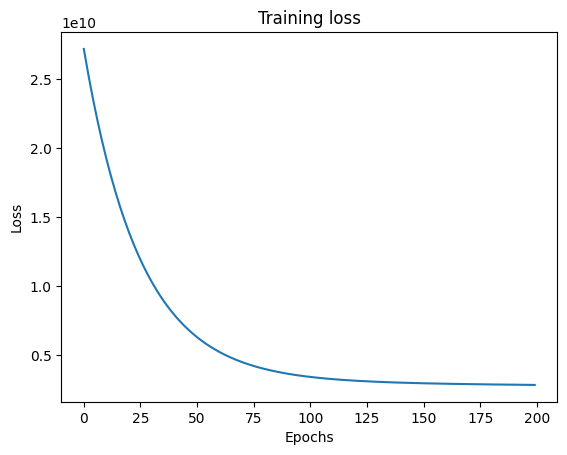

In [99]:
plt.plot([i for i in range(epochs)], train_loss)
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()